# **Ejemplo** 5 Árboles de decisión

## Introducción

En este ejemplo vamos a aplicar árboles de decisión a problemas de regresión y clasificación. En particular, utilizaremos árboles de regresión para predecir el precio mediano de las casas en Boston y para predecir la aceptabilidad de los autos.

## 1: Construir un árbol de regresión
#### ¿Cómo se construye un árbol de regresión?

Se utiliza un algorítmo voraz (greedy) de **división binaria recursiva:**

- Comenzar en la raíz del árbol.
- Para cada atributo, examinar cada punto de corte posible y elegir el atributo y punto de corte de manera que el árbol resultante de hacer la división tenga el **menor error cuadrático medio (ECM)**.
- Repetir el proceso para las dos ramas resultantes y nuevamente hacer una sola división (en cada rama) para minimizar el ECM.
- Repitir este proceso hasta que se cumpla un criterio de detención.

**¿Cómo sabe cuándo parar?**

1. Podríamos definir un criterio de detención, como la **profundidad máxima** del árbol o **el número mínimo de muestras en la hoja**.
2. También podríamos hacer crecer el árbol grande y luego "podarlo" utilizando algún método de poda como "cost complexity pruning"

### 1.a  Realizar un análisis descriptivo del dataset

El set de entrenamiento es el viejo y conocido dataset de Boston. El objetivo es predecir el precio mediano de los condados.   

Instrucciones:

1. Leer los datos con Pandas.
- Explorar los datos ordenándolos o graficándolos.

In [17]:
# Leer los datos con Pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['price'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### 2: Construir un árbol de regresión con scikit-learn

Como puede intuirse, construir un árbol a mano no es tan fácil. Ahora vamos autilizar scikit-learn para construir un árbol de regresión óptimo. 
Hacer lo siguiente:

- Mapear la columna `type` a una variable binaria
- Crear una matriz `X` que contenga los valores de los atributos y un vector `y` que contenga los precios
- Partir los datos en entrenamiento-testeo usando un `random_state`=42 y un `test_size` del 30%
- Importar e inicializar el `DecisionTreeRegressor` de scikit-learn
- Ajustarlo al set de entrenamiento
- Predecir los valores del set de testeo
- Mostrar los valores predichos y reales en un gráfico
- Usar r2_score para juzgar la bondad de la regresión

In [18]:
# partimos en entrenamiento-prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [31]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [32]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [19]:
# Importar el DecisionTreeRegressor, inicializarlo y ajustarlo al set de entrenamiento
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1,criterion='squared_error')
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [20]:
# Predecir los precios del set de prueba
preds = treereg.predict(X_test)

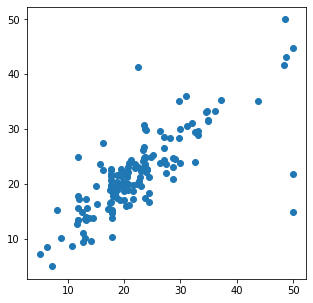

In [21]:
# Mostrar los valores predichos y reales en un gráfico
plt.figure(figsize=(5,5))
plt.scatter(preds, y_test);

In [22]:
# Usar r2_score para obtener la bondad de la regresion
from sklearn.metrics import r2_score
r2_score(y_test, preds) 

0.46529064345422977

In [23]:
preds_train = treereg.predict(X_train)

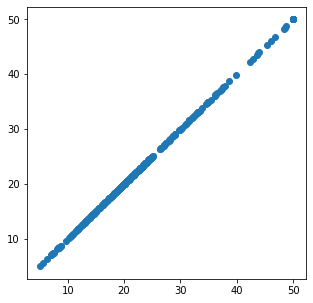

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(preds_train, y_train);

In [25]:
from sklearn.metrics import r2_score
r2_score(y_train, preds_train)

1.0

### 2.b Parámetros globales

El `DecisionTreeRegressor` ofrece pocos parámetros globales que se pueden cambiar en la inicialización. Por ejemplo, se pueden establecer los parámetros `max_depth` o `min_samples_leaf` e imponer limitaciones globales en el espacio de las soluciones.

1. Utilizar `cross_val_score` y hacer validación cruzada de 3-fold para encontrar el valor óptimo para `max_depth` (explorar los valores 1 - 10). Tener en cuenta que tendrá que establecer `scoring='neg_mean_squared_error'` como criterio para el score. Establecer siempre `random_state=1`
- Graficar el error como función de `max_depth`

In [26]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [27]:
# Usar cross-validation para encontrar el mejor max_depth
from sklearn.model_selection import cross_val_score
import numpy as np

Mejor score: 5.982697567864072
Mejor depth: 4


DecisionTreeRegressor(max_depth=4, random_state=1)

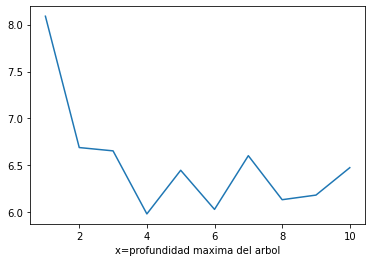

In [29]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 11):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # Selecciona el mejor comparando con el mejor hasta ahora.
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # Agrega a la lista de scores para graficar
    all_scores.append(current_score)
    
print("Mejor score: %s" % best_score)
print("Mejor depth: %s" % best_depth)

# Graficar el error como función del max_depth
plt.figure()
plt.plot(range(1, 11), all_scores)
plt.xlabel('x=profundidad maxima del arbol')

# Ajustar el modelo utilizando la mejor max_depth
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

In [34]:
all_scores

[8.089014495863092,
 6.689846308409055,
 6.654580837071801,
 5.982697567864072,
 6.44783061987157,
 6.0309821143593725,
 6.603042387904279,
 6.134163371334427,
 6.183236455909849,
 6.475430896405847]

### 2.c Importancia de los atributos

La clase DecisionTreeRegressor expone un atributo llamado `feature_importances_`. Es la contribunción a la reducción en la métrica de error utilizada (en este caso, MSE) a lo largo de todo el árbol. 

1. Comprobar la importancia de cada atributo. ¿Cuál es la más importante? ¿De qué otra forma podríamos visualizar esta importancia de forma más simple?

In [13]:
pd.DataFrame({'atributo':data.feature_names, 'importancia':treereg.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
5,RM,0.630160
12,LSTAT,0.203581
7,DIS,0.075002
4,NOX,0.041732
0,CRIM,0.030046
11,B,0.014712
10,PTRATIO,0.004132
6,AGE,0.000634
1,ZN,0.000000
2,INDUS,0.000000


### 2.d Visualización del árbol

Seguir el ejemplo de la [documentación](http://scikit-learn.org/stable/modules/tree.html) para visualizar el árbol.  
Podría ser necesario instalar `pydotplus` si aún no lo tiene instalado.

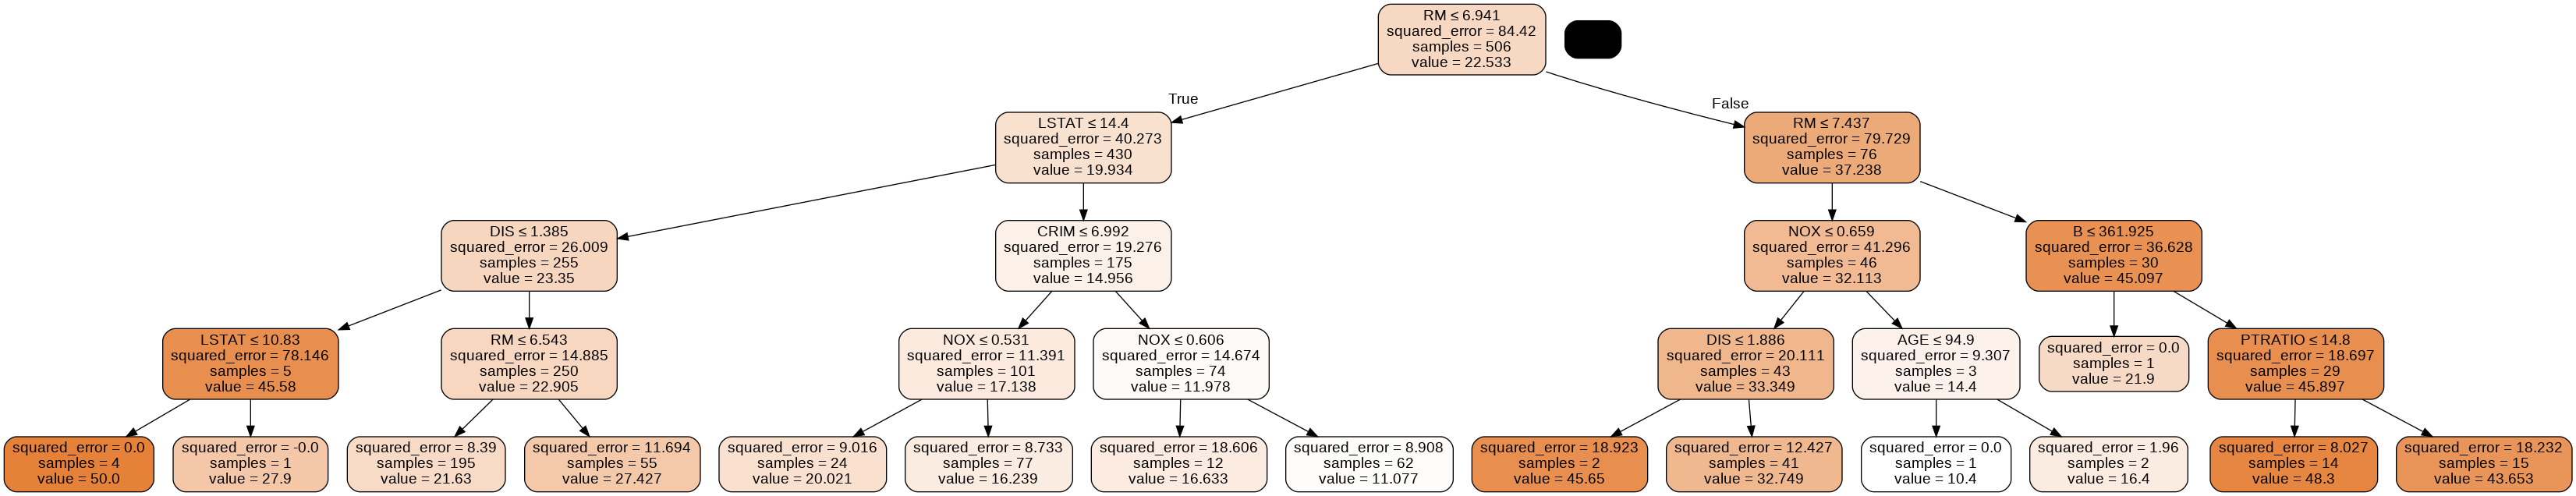

In [33]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=export_graphviz(treereg, out_file=None,  
                feature_names=data.feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

#### Interpretando el diagrama de un árbol

¿Cómo leer este árbol de decisión?

**Nodos internos:**

- `samples` es el número de observaciones en el nodo antes de ser dividido. (verificar que es la suma del valor `samples` de sus nodos hijos)
- `mse` es el error cuadrático medio calculado comparando los valores observados de respuesta en ese nodo con el valor medio de respuesta en ese nodo
- La primera línea es la condición utilizada para dividir ese nodo (ir a la izquierda si es verdadera, ir a la derecha si es falsa)

**Hojas:**

- `samples` es el número de observaciones en el nodo
- `value` es el valor medio de respuesta en ese nodo
- `mse` es el error cuadrático medio calculado comparando los valores observados de respuesta en ese nodo frente a `value`

### 2.e Usar GridSearchCV para encontrar el mejor Árbol de Regresión

¿Cómo sabemos que la poda con profundidad máxima (max_depth) es el mejor modelo para nosotros? Los árboles ofrecen una variedad de formas de pre-poda (es decir, le decimos a la computadora cómo diseñar el árbol resultante con ciertas restricciones).

Medida            | Que hace
------------------|-------------
max_depth         | limita la altura del árbol (niveles-2)
max_features      | limita la cantidad de atributos a utilizar en una división
max_leaf_nodes    | limita la cantidad máxima de nodos hoja puede tener el árbol
min_samples_leaf  | cantidad mínima de muestras de una hoja
min_samples_split | cantidad mínima de muestras para dividir un nodo

1. Inicialice rangos razonables para todos los parámetros y encuentre la combinación óptima utilizando Grid Search.

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
DecisionTreeRegressor(max_depth=6, max_features=4, max_leaf_nodes=9,
                      min_samples_leaf=3, random_state=1)
-33.76323661160101
5.810614133772868


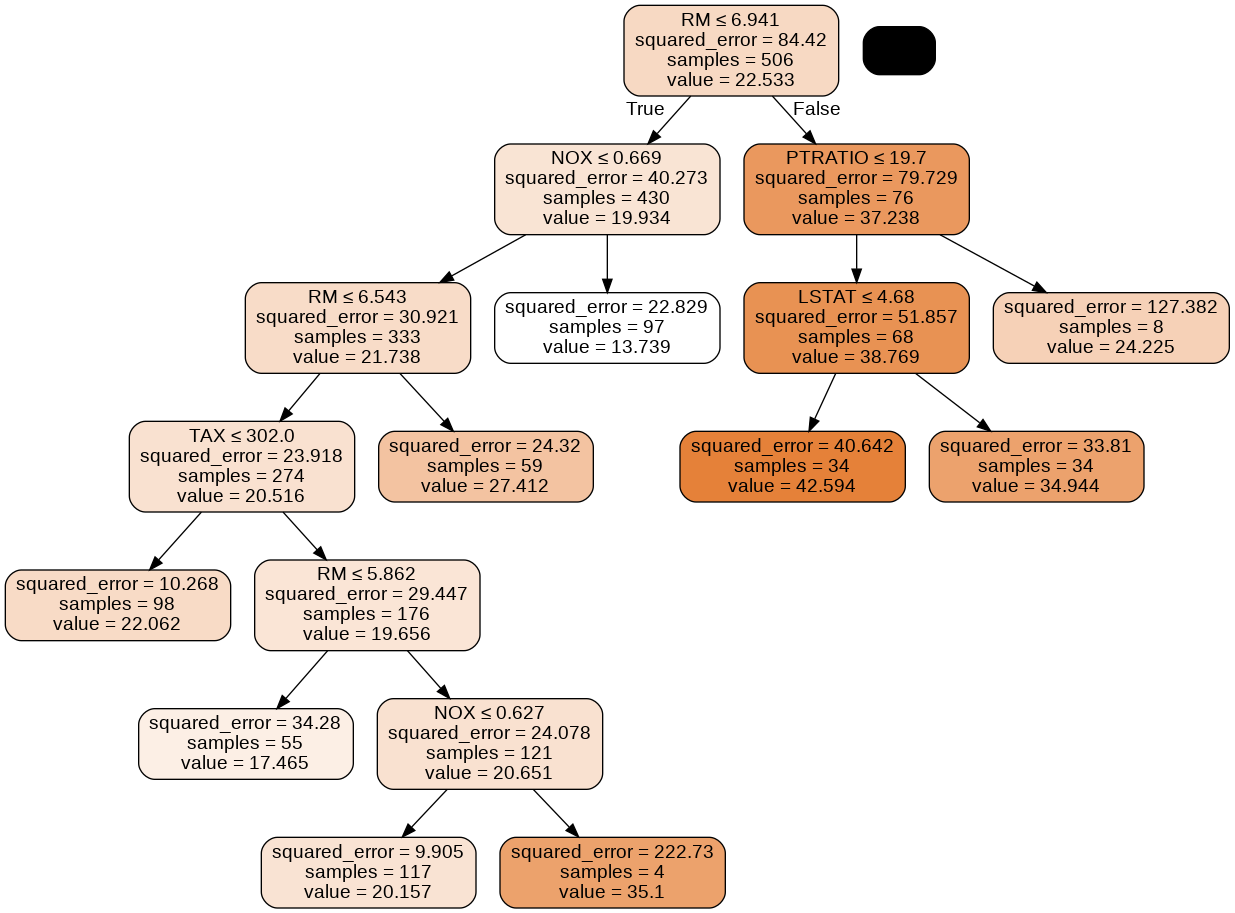

In [35]:
from sklearn.model_selection import GridSearchCV

PARAMETROS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[2,3,4]}

#Se hace la búsqueda con Grid Search
model = DecisionTreeRegressor(random_state=1)
gs = GridSearchCV(model, PARAMETROS, scoring='neg_mean_squared_error', verbose=1 , n_jobs=-1)
gs.fit(X, y)

# Se muestran los mejores resultados
print(gs.best_estimator_)
print(gs.best_score_)
print(np.sqrt(-gs.best_score_))

# Se grafica el mejor arbol
dot_data=export_graphviz(gs.best_estimator_, out_file=None,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  